### Heart disease prediction
This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to
this date. 

#### The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.

Attribute Information:

1) age
2) sex
3) chest pain type (4 values)
4) resting blood pressure
5) serum cholestoral in mg/dl
6) fasting blood sugar > 120 mg/dl
7) resting electrocardiographic results (values 0,1,2)
8) maximum heart rate achieved
9) exercise induced angina
10) oldpeak = ST depression induced by exercise relative to rest
11) the slope of the peak exercise ST segment
12) number of major vessels (0-3) colored by flourosopy
13) thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

The names and social security numbers of the patients were recently removed from the database, replaced with dummy values. One file has been "processed", that one containing the Cleveland database. All four unprocessed files also exist in this directory.

In [55]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [56]:
data = pd.read_csv('data/heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [57]:
import seaborn as sns

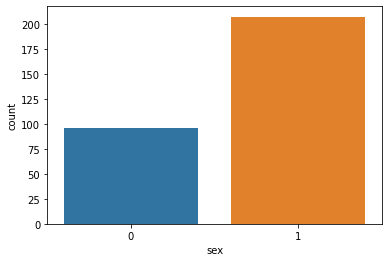

In [58]:
sns.countplot(data.sex)

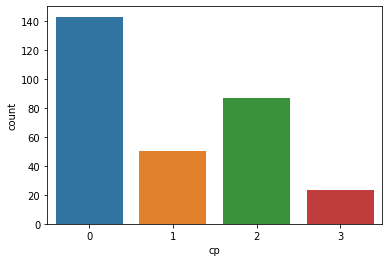

In [59]:
sns.countplot(data.cp)

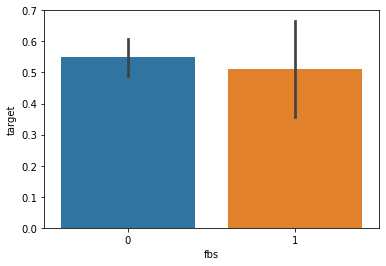

In [60]:
sns.barplot(x=data.fbs, y=data.target)

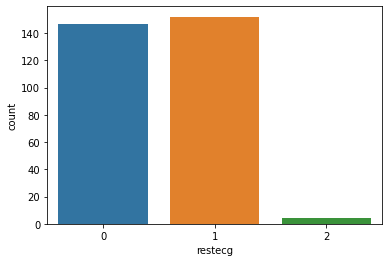

In [61]:
sns.countplot(data.restecg)

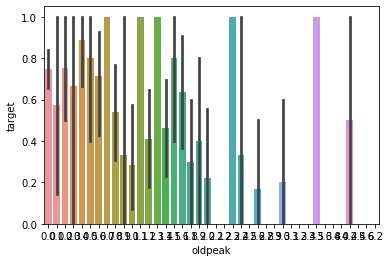

In [62]:
sns.barplot(x=data.oldpeak, y=data.target)

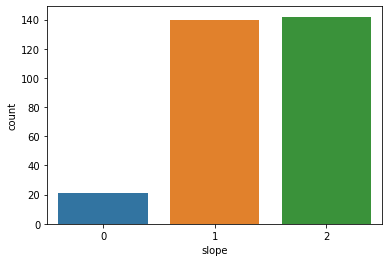

In [63]:
sns.countplot(data.slope)

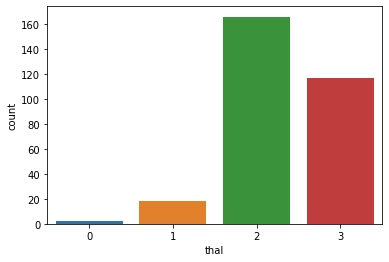

In [64]:
sns.countplot(data.thal)

In [65]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Target')

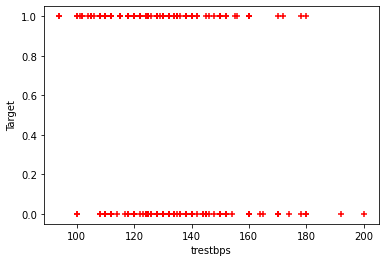

In [66]:
plt.scatter(data[['trestbps']], data.target, color='red', marker='+')
plt.xlabel('trestbps')
plt.ylabel('Target')

Text(0, 0.5, 'Target')

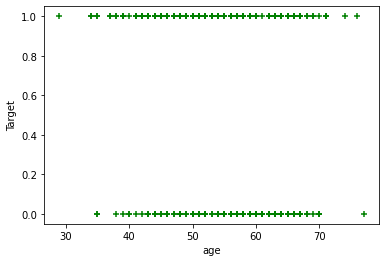

In [67]:
plt.scatter(data[['age']], data.target, color='green', marker='+')
plt.xlabel('age')
plt.ylabel('Target')

In [68]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [70]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [71]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [72]:
X = data.drop('target', axis='columns')
y = data.target

In [73]:
X.shape

(303, 13)

In [74]:
y.shape

(303,)

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [76]:
X_train.shape

(242, 13)

In [77]:
X_test.shape

(61, 13)

## ANN model with keras

In [ ]:
pip install keras

In [ ]:
pip install tensorflow

In [80]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
import matplotlib.pyplot as plt

In [81]:
model = Sequential()
# add first hidden layer with input diamension
model.add(Dense(units = 128, activation='relu', kernel_initializer = 'he_uniform', input_dim = 13))
# add second hidden layer
model.add(Dense(units = 16, activation='relu', kernel_initializer = 'he_uniform'))
# add output layer
model.add(Dense(units = 1, activation = 'sigmoid', kernel_initializer = 'glorot_uniform'))

In [82]:
# now we compile the model
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
# train the model
model.fit(X_train, y_train, batch_size = 128, epochs = 150, verbose = 1)

Epoch 1/150
2/2 [==============================] - 0s 2ms/step - loss: 80.0820 - accuracy: 0.4512
Epoch 2/150
2/2 [==============================] - 0s 2ms/step - loss: 68.2664 - accuracy: 0.4329
Epoch 3/150
2/2 [==============================] - 0s 2ms/step - loss: 53.5674 - accuracy: 0.4486
Epoch 4/150
2/2 [==============================] - 0s 3ms/step - loss: 41.5016 - accuracy: 0.4460
Epoch 5/150
2/2 [==============================] - 0s 3ms/step - loss: 28.1632 - accuracy: 0.4616
Epoch 6/150
2/2 [==============================] - 0s 3ms/step - loss: 15.5900 - accuracy: 0.4752
Epoch 7/150
2/2 [==============================] - 0s 3ms/step - loss: 5.2805 - accuracy: 0.5375
Epoch 8/150
2/2 [==============================] - 0s 3ms/step - loss: 7.7048 - accuracy: 0.5916
Epoch 9/150
2/2 [==============================] - 0s 2ms/step - loss: 12.5396 - accuracy: 0.5675
Epoch 10/150
2/2 [==============================] - 0s 3ms/step - loss: 13.2269 - accuracy: 0.5568
Epoch 11/150
2/2 [===

2/2 [==============================] - 0s 5ms/step - loss: 0.4889 - accuracy: 0.7590
Epoch 85/150
2/2 [==============================] - 0s 5ms/step - loss: 0.4978 - accuracy: 0.7459
Epoch 86/150
2/2 [==============================] - 0s 3ms/step - loss: 0.4851 - accuracy: 0.7728
Epoch 87/150
2/2 [==============================] - 0s 3ms/step - loss: 0.4881 - accuracy: 0.7567
Epoch 88/150
2/2 [==============================] - 0s 3ms/step - loss: 0.4965 - accuracy: 0.7624
Epoch 89/150
2/2 [==============================] - 0s 3ms/step - loss: 0.4819 - accuracy: 0.7649
Epoch 90/150
2/2 [==============================] - 0s 3ms/step - loss: 0.4763 - accuracy: 0.7592
Epoch 91/150
2/2 [==============================] - 0s 3ms/step - loss: 0.4581 - accuracy: 0.7779
Epoch 92/150
2/2 [==============================] - 0s 3ms/step - loss: 0.4875 - accuracy: 0.7462
Epoch 93/150
2/2 [==============================] - 0s 3ms/step - loss: 0.4804 - accuracy: 0.7730
Epoch 94/150
2/2 [===============

In [83]:
acc = model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 2ms/step - loss: 0.5784 - accuracy: 0.6885


In [84]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1792      
_________________________________________________________________
dense_1 (Dense)              (None, 16)                2064      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 3,873
Trainable params: 3,873
Non-trainable params: 0
_________________________________________________________________


In [85]:
y_ann = model.predict(X_test)
y_ann = y_ann > 0.5

In [86]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_ann, y_test)
cm

array([[18,  7],
       [12, 24]])